In [1]:
import re
import pandas as pd

In [2]:
intial_chat = open('WhatsApp Chat with M.TECH DATA SCIENCE 2022.txt','r',encoding = 'utf-8')

In [3]:
chat_history = intial_chat.read()

In [4]:
print(chat_history)

8/1/22, 4:31 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/1/22, 1:10 PM - Pratik DTU created group "M.TECH DATA SCIENCE 2022"
8/1/22, 4:20 PM - Sharda DTU added you
8/1/22, 4:21 PM - Sharda DTU added Osama Mustafa
8/1/22, 4:25 PM - Sharda DTU added +91 85878 24401
8/1/22, 4:27 PM - Sharda DTU added Aditya DTU
8/1/22, 4:28 PM - Sharda DTU: hey its a dedicated group of data science
8/1/22, 4:28 PM - Sharda DTU: so add only data science student here
8/1/22, 4:28 PM - Sharda DTU: if you are a software engineering student please please do leave it
8/1/22, 4:47 PM - +91 74045 33915 left
8/1/22, 5:23 PM - Sharda DTU changed this group's icon
8/1/22, 5:36 PM - Anmol DTU changed the group description
8/1/22, 5:38 PM - Sharda DTU changed this group's settings to allow only admins to edit this group's info
8/1/22, 5:36 PM - Pratik DTU: Those who are not in official grp send ur no. ASAP
8/1/22, 5:

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s*[AP]M\s-\s'

In [6]:
messages = re.split(pattern,chat_history)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Pratik DTU created group "M.TECH DATA SCIENCE 2022"\n', 'Sharda DTU added you\n', 'Sharda DTU added Osama Mustafa\n', 'Sharda DTU added +91 85878 24401\n', 'Sharda DTU added Aditya DTU\n', 'Sharda DTU: hey its a dedicated group of data science\n', 'Sharda DTU: so add only data science student here\n', 'Sharda DTU: if you are a software engineering student please please do leave it\n', '+91 74045 33915 left\n', "Sharda DTU changed this group's icon\n", 'Anmol DTU changed the group description\n', "Sharda DTU changed this group's settings to allow only admins to edit this group's info\n", 'Pratik DTU: Those who are not in official grp send ur no. ASAP\n', 'Anmol DTU: Told by priya maam\n', '+91 98756 70236: Name of official group?\n', "Pratik DTU: MTECH DS Aug'22\n", 'Pratik DTU: Name of official grp\n', '+91 98756 70236: Ok thnks.. then i am 

In [7]:
dates = re.findall(pattern,chat_history)
dates = [r.replace('\u202f', '') for r in dates]
print(dates)

['8/1/22, 4:31PM - ', '8/1/22, 1:10PM - ', '8/1/22, 4:20PM - ', '8/1/22, 4:21PM - ', '8/1/22, 4:25PM - ', '8/1/22, 4:27PM - ', '8/1/22, 4:28PM - ', '8/1/22, 4:28PM - ', '8/1/22, 4:28PM - ', '8/1/22, 4:47PM - ', '8/1/22, 5:23PM - ', '8/1/22, 5:36PM - ', '8/1/22, 5:38PM - ', '8/1/22, 5:36PM - ', '8/1/22, 5:37PM - ', '8/1/22, 5:38PM - ', '8/1/22, 5:38PM - ', '8/1/22, 5:39PM - ', '8/1/22, 5:39PM - ', '8/1/22, 5:39PM - ', '8/1/22, 5:40PM - ', '8/1/22, 5:40PM - ', '8/1/22, 5:44PM - ', '8/1/22, 5:49PM - ', '8/1/22, 5:50PM - ', '8/1/22, 5:50PM - ', '8/1/22, 5:51PM - ', '8/1/22, 5:51PM - ', '8/1/22, 5:51PM - ', '8/1/22, 5:52PM - ', '8/1/22, 5:52PM - ', '8/1/22, 5:53PM - ', '8/1/22, 5:53PM - ', '8/1/22, 5:54PM - ', '8/1/22, 5:59PM - ', '8/1/22, 5:59PM - ', '8/1/22, 5:59PM - ', '8/1/22, 6:00PM - ', '8/1/22, 6:01PM - ', '8/1/22, 6:02PM - ', '8/1/22, 6:02PM - ', '8/1/22, 6:02PM - ', '8/1/22, 6:03PM - ', '8/1/22, 6:03PM - ', '8/1/22, 6:21PM - ', '8/1/22, 6:23PM - ', '8/1/22, 6:29PM - ', '8/1/22, 6:2

In [8]:
def toConvert(date_string):
    dt = datetime.strptime(date_string, '%m/%d/%y, %I:%M%p - ')
    formatted_date = dt.strftime('%m/%d/%y, %I:%M%p')
    dt_obj = datetime.strptime(formatted_date, '%m/%d/%y, %I:%M%p')
    formatted_date = dt_obj.strftime('%Y-%m-%d %H:%M:%S')
    return pd.to_datetime(formatted_date)

In [9]:
from datetime import datetime
chat_info = pd.DataFrame({'messages':messages, 'message_date':dates})

## convert message_date to date format
chat_info['message_date'] = chat_info['message_date'].apply(toConvert) 

In [10]:
chat_info.rename(columns={'message_date':'date_time'}, inplace=True)

In [11]:
chat_info.rename(columns={'messages':'user_message'}, inplace=True)

In [12]:
chat_info.head()
chat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  6965 non-null   object        
 1   date_time     6965 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 109.0+ KB


In [13]:
len(chat_info)

6965

In [14]:
users = []
messages = []
for message in chat_info['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: ## user
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
chat_info['user'] = users
chat_info['message'] = messages
chat_info.drop(columns=['user_message'], inplace= True)

In [15]:
chat_info.head(15)

,date_time,user,message
0,2022-08-01 16:31:00,Group Notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-01 13:10:00,Group Notification,"Pratik DTU created group ""M.TECH DATA SCIENCE ..."
2,2022-08-01 16:20:00,Group Notification,Sharda DTU added you\n
3,2022-08-01 16:21:00,Group Notification,Sharda DTU added Osama Mustafa\n
4,2022-08-01 16:25:00,Group Notification,Sharda DTU added +91 85878 24401\n
5,2022-08-01 16:27:00,Group Notification,Sharda DTU added Aditya DTU\n
6,2022-08-01 16:28:00,Sharda DTU,hey its a dedicated group of data science\n
7,2022-08-01 16:28:00,Sharda DTU,so add only data science student here\n
8,2022-08-01 16:28:00,Sharda DTU,if you are a software engineering student plea...
9,2022-08-01 16:47:00,Group Notification,+91 74045 33915 left\n


In [16]:
##chat_info['date'] = pd.to_datetime(chat_info['date'])

In [17]:
chat_info['year'] = chat_info['date_time'].dt.year

In [18]:
chat_info['month'] = chat_info['date_time'].dt.month_name()

In [19]:
chat_info['day'] = chat_info['date_time'].dt.day

In [20]:
chat_info['hour'] = chat_info['date_time'].dt.hour

In [21]:
chat_info['minute'] = chat_info['date_time'].dt.minute

In [22]:
chat_info

,date_time,user,message,year,month,day,hour,minute
0,2022-08-01 16:31:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2022,August,1,16,31
1,2022-08-01 13:10:00,Group Notification,"Pratik DTU created group ""M.TECH DATA SCIENCE ...",2022,August,1,13,10
2,2022-08-01 16:20:00,Group Notification,Sharda DTU added you\n,2022,August,1,16,20
3,2022-08-01 16:21:00,Group Notification,Sharda DTU added Osama Mustafa\n,2022,August,1,16,21
4,2022-08-01 16:25:00,Group Notification,Sharda DTU added +91 85878 24401\n,2022,August,1,16,25
...,...,...,...,...,...,...,...,...
6960,2023-05-12 20:17:00,Vaibhavi Mishra,Ok\n,2023,May,12,20,17
6961,2023-05-13 15:43:00,Anmol DTU,@919021567060\n,2023,May,13,15,43
6962,2023-05-13 15:43:00,Anmol DTU,?\n,2023,May,13,15,43
6963,2023-05-13 15:43:00,Vaibhavi Mishra,Ma'am ne koi reply nahi diya\n,2023,May,13,15,43


In [23]:
sum = 0
for message in chat_info['message']:
    sum = sum + len(message.split())
    
sum

39926

In [24]:
words = []
for message in chat_info['message']:
    words.extend(message.split())
    
len(words)

39926

In [25]:
chat_info[(chat_info['user'] == 'Vaibhavi Mishra') & (chat_info['message'] == '<Media omitted>\n')].shape[0]

67

In [26]:
from urlextract import URLExtract

extract = URLExtract()
urls = extract.find_urls('Found at www.google.com and got through www.stackoverflow.in and will go to www.udemy.com')
print(urls)

['www.google.com', 'www.stackoverflow.in', 'www.udemy.com']


In [27]:
links = []
for message in chat_info['message']:
    links.extend(extract.find_urls(message))
    
print(len(links))

121


In [28]:
top_5_users = chat_info['user'].value_counts().head()
top_5_users

user
Sharda DTU         2259
Vaibhavi Mishra     938
Anmol DTU           911
Pratik DTU          423
LORD Bikki          406
Name: count, dtype: int64

In [29]:
import matplotlib.pyplot as plt

In [30]:
users = top_5_users.index
message_counts = top_5_users.values

<BarContainer object of 5 artists>

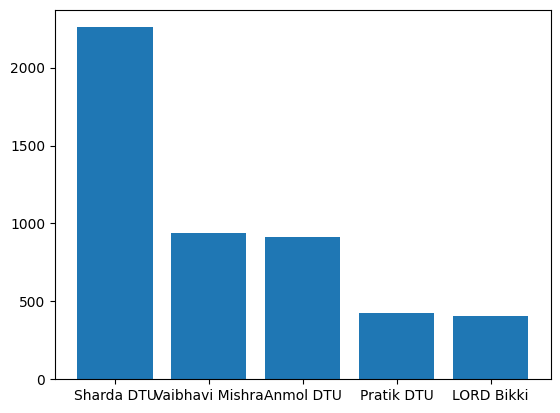

In [31]:
plt.bar(users, message_counts)

In [32]:
(chat_info['user'].value_counts()/chat_info.shape[0])*100

user
Sharda DTU            32.433597
Vaibhavi Mishra       13.467337
Anmol DTU             13.079684
Pratik DTU             6.073223
LORD Bikki             5.829146
Sourav Seal            5.671213
Harshit DTU            4.120603
Rohit ਰੋਹਿਤ            3.302225
Jaya DTU               3.201723
Osama Mustafa          2.972003
Anushka Upadhyaya      2.555635
+91 6383 176 449       2.469490
+91 95720 48444        0.875808
Onik DTU               0.861450
Gaurav DTU             0.861450
Tarakashar Das DTU     0.818378
Group Notification     0.588658
Aditya DTU             0.301508
+91 79926 31907        0.215363
+91 98756 70236        0.186648
+91 85878 24401        0.114860
Name: count, dtype: float64

In [33]:
((chat_info['user'].value_counts()/chat_info.shape[0])*100).reset_index().rename(columns = {"index": "user", "user": "count"})

,count,count
0,Sharda DTU,32.433597
1,Vaibhavi Mishra,13.467337
2,Anmol DTU,13.079684
3,Pratik DTU,6.073223
4,LORD Bikki,5.829146
5,Sourav Seal,5.671213
6,Harshit DTU,4.120603
7,Rohit ਰੋਹਿਤ,3.302225
8,Jaya DTU,3.201723
9,Osama Mustafa,2.972003


In [34]:
words = []
for message in chat_info['message']:
    words.extend(message.split())

In [35]:
from collections import Counter
data = Counter(words).most_common(20)

In [36]:
data

[('hai', 790),
 ('h', 755),
 ('to', 607),
 ('<Media', 589),
 ('omitted>', 589),
 ('ki', 384),
 ('class', 375),
 ('me', 350),
 ('ke', 324),
 ('ka', 321),
 ('se', 301),
 ('the', 287),
 ('bhi', 260),
 ('ko', 252),
 ('hi', 228),
 ('ho', 217),
 ('kya', 194),
 ('nahi', 190),
 ('and', 184),
 ('nhi', 183)]

In [37]:
commonly_used_words = pd.DataFrame(data)
commonly_used_words.head()

,0,1
0,hai,790
1,h,755
2,to,607
3,<Media,589
4,omitted>,589


In [38]:
commonly_used_words.rename(columns={0:"word", 1:"frequency"})

,word,frequency
0,hai,790
1,h,755
2,to,607
3,<Media,589
4,omitted>,589
5,ki,384
6,class,375
7,me,350
8,ke,324
9,ka,321


In [39]:
## These are the stop words as they don't have a significant meaning.

In [40]:
## Remove user column values which contain "group notification"
## Remove message column values which contain "media omiited"
## Remove message column values which contain STOP WORDS

In [41]:
modified_chat = chat_info[(chat_info['user'] != 'Group Notfication') | (chat_info['message'] != '<Media omitted>\n')]
modified_chat

,date_time,user,message,year,month,day,hour,minute
0,2022-08-01 16:31:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2022,August,1,16,31
1,2022-08-01 13:10:00,Group Notification,"Pratik DTU created group ""M.TECH DATA SCIENCE ...",2022,August,1,13,10
2,2022-08-01 16:20:00,Group Notification,Sharda DTU added you\n,2022,August,1,16,20
3,2022-08-01 16:21:00,Group Notification,Sharda DTU added Osama Mustafa\n,2022,August,1,16,21
4,2022-08-01 16:25:00,Group Notification,Sharda DTU added +91 85878 24401\n,2022,August,1,16,25
...,...,...,...,...,...,...,...,...
6960,2023-05-12 20:17:00,Vaibhavi Mishra,Ok\n,2023,May,12,20,17
6961,2023-05-13 15:43:00,Anmol DTU,@919021567060\n,2023,May,13,15,43
6962,2023-05-13 15:43:00,Anmol DTU,?\n,2023,May,13,15,43
6963,2023-05-13 15:43:00,Vaibhavi Mishra,Ma'am ne koi reply nahi diya\n,2023,May,13,15,43


In [42]:
temp = chat_info[chat_info['user'] != 'Group Notification']

In [43]:
temp = temp[temp['message'] != '<Media omitted>\n']

In [44]:
temp

,date_time,user,message,year,month,day,hour,minute
6,2022-08-01 16:28:00,Sharda DTU,hey its a dedicated group of data science\n,2022,August,1,16,28
7,2022-08-01 16:28:00,Sharda DTU,so add only data science student here\n,2022,August,1,16,28
8,2022-08-01 16:28:00,Sharda DTU,if you are a software engineering student plea...,2022,August,1,16,28
13,2022-08-01 17:36:00,Pratik DTU,Those who are not in official grp send ur no. ...,2022,August,1,17,36
14,2022-08-01 17:37:00,Anmol DTU,Told by priya maam\n,2022,August,1,17,37
...,...,...,...,...,...,...,...,...
6960,2023-05-12 20:17:00,Vaibhavi Mishra,Ok\n,2023,May,12,20,17
6961,2023-05-13 15:43:00,Anmol DTU,@919021567060\n,2023,May,13,15,43
6962,2023-05-13 15:43:00,Anmol DTU,?\n,2023,May,13,15,43
6963,2023-05-13 15:43:00,Vaibhavi Mishra,Ma'am ne koi reply nahi diya\n,2023,May,13,15,43


In [45]:
f = open('stop_words_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
couldn
couldnt
couldn't
d
de
dede
dega
d

In [46]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [47]:
words

['dedicated',
 'group',
 'data',
 'science',
 'data',
 'science',
 'student',
 'software',
 'engineering',
 'student',
 'leave',
 'official',
 'grp',
 'send',
 'no.',
 'asap',
 'told',
 'priya',
 'maam',
 'official',
 'group?',
 'mtech',
 "aug'22",
 'official',
 'grp',
 'thnks..',
 '🤘🏻',
 'message',
 'deleted',
 'check',
 'miss......',
 'mtech',
 "aug'22",
 '...',
 'kindly',
 'rest',
 'added',
 'group',
 'https://chat.whatsapp.com/hrx35naui5icniqcqwkha8',
 'official',
 'https://chat.whatsapp.com/knenbp2raxe5safcydibvo',
 'message',
 'deleted',
 'official',
 'sw',
 'data',
 'science',
 'required',
 'join',
 'grp',
 'right?',
 'group',
 '1',
 'm.tech',
 'official',
 'group',
 '2.',
 '.m.tech',
 'swe',
 'official',
 'group',
 '3',
 '.',
 'm.tech',
 'swe',
 'unofficial',
 'group',
 '4.',
 'm.tech',
 'unofficial',
 'group',
 'check',
 'miss',
 'required',
 'table',
 'correction',
 'required',
 'monday',
 'class-',
 'room',
 'wrong',
 'acha..',
 'correct',
 'share',
 'circulate',
 'confirmed

In [48]:
from collections import Counter
df = Counter(words).most_common(20)

In [49]:
df

[('class', 431),
 ('mam', 192),
 ('lab', 178),
 ('nhin', 173),
 ('maam', 138),
 ('happy', 129),
 ('message', 128),
 ('@918529224824', 118),
 ('?', 115),
 ('aos', 107),
 ('deleted', 105),
 ('dme', 102),
 ('@919021567060', 98),
 ('birthday', 96),
 ('1', 89),
 ('phir', 85),
 ('2', 84),
 ('dena', 83),
 ('form', 71),
 ('sir', 70)]

In [50]:
commonly_used_words = pd.DataFrame(df)
commonly_used_words

,0,1
0,class,431
1,mam,192
2,lab,178
3,nhin,173
4,maam,138
5,happy,129
6,message,128
7,@918529224824,118
8,?,115
9,aos,107


In [51]:
commonly_used_words = commonly_used_words.rename(columns={0:"word", 1:"frequency"})

In [52]:
commonly_used_words

,word,frequency
0,class,431
1,mam,192
2,lab,178
3,nhin,173
4,maam,138
5,happy,129
6,message,128
7,@918529224824,118
8,?,115
9,aos,107


In [53]:
commonly_used_words[~commonly_used_words['word'].isin([0,1,2,3,4,5,6,7,8,9])]

,word,frequency
0,class,431
1,mam,192
2,lab,178
3,nhin,173
4,maam,138
5,happy,129
6,message,128
7,@918529224824,118
8,?,115
9,aos,107


In [54]:
!pip install emoji

In [55]:
import emoji

In [56]:
emojis = []
pattern = r"^[^a-zA-Z].*[^a-zA-Z]$"

for message in chat_info['message']:
    for word in message:
        if re.search(r"^[^a-zA-Z0-9_]|[^a-zA-Z0-9_]$", word):
            emojis.append(word)
            

In [57]:
emojis

[' ',
 ' ',
 ' ',
 ' ',
 '-',
 '-',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ',',
 ' ',
 ' ',
 ' ',
 ',',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 '"',
 '.',
 ' ',
 ' ',
 ' ',
 '"',
 '\n',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 '+',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 '+',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 "'",
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 "'",
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 "'",
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 '?',
 '\n',
 ' ',
 ' ',
 "'",
 '\n',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 '.',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' '

In [58]:
Emojis = []
for message in chat_info['message']:
    for word in message:
        Emojis.append(word)

In [59]:
Emojis

['M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 's',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'c',
 'a',
 'l',
 'l',
 's',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'e',
 'n',
 'd',
 '-',
 't',
 'o',
 '-',
 'e',
 'n',
 'd',
 ' ',
 'e',
 'n',
 'c',
 'r',
 'y',
 'p',
 't',
 'e',
 'd',
 '.',
 ' ',
 'N',
 'o',
 ' ',
 'o',
 'n',
 'e',
 ' ',
 'o',
 'u',
 't',
 's',
 'i',
 'd',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'c',
 'h',
 'a',
 't',
 ',',
 ' ',
 'n',
 'o',
 't',
 ' ',
 'e',
 'v',
 'e',
 'n',
 ' ',
 'W',
 'h',
 'a',
 't',
 's',
 'A',
 'p',
 'p',
 ',',
 ' ',
 'c',
 'a',
 'n',
 ' ',
 'r',
 'e',
 'a',
 'd',
 ' ',
 'o',
 'r',
 ' ',
 'l',
 'i',
 's',
 't',
 'e',
 'n',
 ' ',
 't',
 'o',
 ' ',
 't',
 'h',
 'e',
 'm',
 '.',
 ' ',
 'T',
 'a',
 'p',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 ' ',
 'm',
 'o',
 'r',
 'e',
 '.',
 '\n',
 'P',
 'r',
 'a',
 't',
 'i',
 'k',
 ' ',
 'D',
 'T',
 'U',
 ' ',
 'c',
 'r',
 'e',
 'a',
 't',
 'e',
 'd',
 ' ',
 'g',
 'r',
 'o',
 'u',
 'p',
 ' ',
 '"',
 'M

In [60]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [61]:
real_emojis = [i for i in Emojis if re.match(emoji_pattern, str(i))]

In [62]:
real_emojis

['🏻',
 '👍',
 '🏻',
 '🏻',
 '😂',
 '😂',
 '🙋',
 '😒',
 '😂',
 '😂',
 '😂',
 '🙏',
 '🏻',
 '😅',
 '😂',
 '😅',
 '😂',
 '😅',
 '😅',
 '😂',
 '😭',
 '😭',
 '😭',
 '😅',
 '👍',
 '👍',
 '👍',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😞',
 '🔥',
 '😳',
 '😳',
 '😳',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🏻',
 '😂',
 '🙋',
 '👍',
 '🏻',
 '🏻',
 '😞',
 '😞',
 '😂',
 '😂',
 '🙇',
 '🏻',
 '😃',
 '😂',
 '😂',
 '🏅',
 '😃',
 '😃',
 '😂',
 '😂',
 '😂',
 '👍',
 '🏻',
 '👍',
 '🏻',
 '😞',
 '😳',
 '😳',
 '😳',
 '😂',
 '🏻',
 '😂',
 '😊',
 '😅',
 '🙋',
 '🏻',
 '👍',
 '🏻',
 '👍',
 '🏻',
 '👏',
 '🏻',
 '😂',
 '👍',
 '😅',
 '😂',
 '😂',
 '😂',
 '😅',
 '😂',
 '😂',
 '😂',
 '😎',
 '💯',
 '🏻',
 '👍',
 '👍',
 '🏻',
 '😎',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😃',
 '😃',
 '😃',
 '😃',
 '😂',
 '😅',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😆',
 '😆',
 '😂',
 '😂',
 '😂',
 '😂',
 '💐',
 '🎊',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😀',
 '😃',
 '😃',
 '😂',
 '😞',
 '😳',
 '🏻',
 '😊',
 '😁',
 '🎈',
 '🎈',
 '🇮',
 '🇳',
 '🙋',
 '🏻',
 '🏻',
 '🙋',
 '😇',
 '🏻',
 '😅',
 '😂',
 '😅',
 '😊',
 '😞',
 '😞',
 '😞',
 '😞',
 '😞'

In [63]:
Counter(real_emojis).most_common(20)

[('😂', 224),
 ('🏻', 83),
 ('😭', 43),
 ('🎂', 42),
 ('🍻', 39),
 ('🎉', 34),
 ('😊', 33),
 ('😅', 32),
 ('👍', 31),
 ('🎊', 29),
 ('😞', 24),
 ('🙏', 18),
 ('😃', 16),
 ('😎', 13),
 ('🔥', 12),
 ('🙄', 12),
 ('😳', 9),
 ('😜', 9),
 ('💐', 8),
 ('😑', 8)]

In [64]:
pd.DataFrame(Counter(real_emojis).most_common(20))

,0,1
0,😂,224
1,🏻,83
2,😭,43
3,🎂,42
4,🍻,39
5,🎉,34
6,😊,33
7,😅,32
8,👍,31
9,🎊,29


In [65]:
import pandas as pd
from collections import Counter

# List of emojis to count
emoji_list = ['😊', '❤️', '👍']

# Pandas series column with emojis
emoji_series = pd.Series(['😊', '❤️', '❤️', '👍', '😊', '😊', '👍'])

# Count frequency of each emoji in series
emoji_count = dict(Counter(emoji for emoji in emoji_series if emoji in emoji_list))

# Print the emoji count
print(emoji_count)

{'😊': 3, '❤️': 2, '👍': 2}


In [66]:
import unicodedata
from collections import Counter

def count_emojis(s):
    return Counter(c for c in s if unicodedata.name(c).startswith('EMOJI'))

# example usage
emojiss = count_emojis("Hello world! 😊🌎🎉")
print(emojiss)


Counter()


In [67]:
chat_info['month_num'] = chat_info['date_time'].dt.month
chat_info

,date_time,user,message,year,month,day,hour,minute,month_num
0,2022-08-01 16:31:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2022,August,1,16,31,8
1,2022-08-01 13:10:00,Group Notification,"Pratik DTU created group ""M.TECH DATA SCIENCE ...",2022,August,1,13,10,8
2,2022-08-01 16:20:00,Group Notification,Sharda DTU added you\n,2022,August,1,16,20,8
3,2022-08-01 16:21:00,Group Notification,Sharda DTU added Osama Mustafa\n,2022,August,1,16,21,8
4,2022-08-01 16:25:00,Group Notification,Sharda DTU added +91 85878 24401\n,2022,August,1,16,25,8
...,...,...,...,...,...,...,...,...,...
6960,2023-05-12 20:17:00,Vaibhavi Mishra,Ok\n,2023,May,12,20,17,5
6961,2023-05-13 15:43:00,Anmol DTU,@919021567060\n,2023,May,13,15,43,5
6962,2023-05-13 15:43:00,Anmol DTU,?\n,2023,May,13,15,43,5
6963,2023-05-13 15:43:00,Vaibhavi Mishra,Ma'am ne koi reply nahi diya\n,2023,May,13,15,43,5


In [68]:
chat_info.groupby(['year', 'month_num']).count()['message']

year  month_num
2022  8            2384
      9            1479
      10            857
      11            656
      12            186
2023  1             653
      2             202
      3             251
      4             242
      5              55
Name: message, dtype: int64

In [69]:
timeline = chat_info.groupby(['year', 'month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2022,8,August,2384
1,2022,9,September,1479
2,2022,10,October,857
3,2022,11,November,656
4,2022,12,December,186
5,2023,1,January,653
6,2023,2,February,202
7,2023,3,March,251
8,2023,4,April,242
9,2023,5,May,55


In [70]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [71]:
time

['August-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'December-2022',
 'January-2023',
 'February-2023',
 'March-2023',
 'April-2023',
 'May-2023']

In [72]:
timeline['time'] = time

In [73]:
timeline

,year,month_num,month,message,time
0,2022,8,August,2384,August-2022
1,2022,9,September,1479,September-2022
2,2022,10,October,857,October-2022
3,2022,11,November,656,November-2022
4,2022,12,December,186,December-2022
5,2023,1,January,653,January-2023
6,2023,2,February,202,February-2023
7,2023,3,March,251,March-2023
8,2023,4,April,242,April-2023
9,2023,5,May,55,May-2023


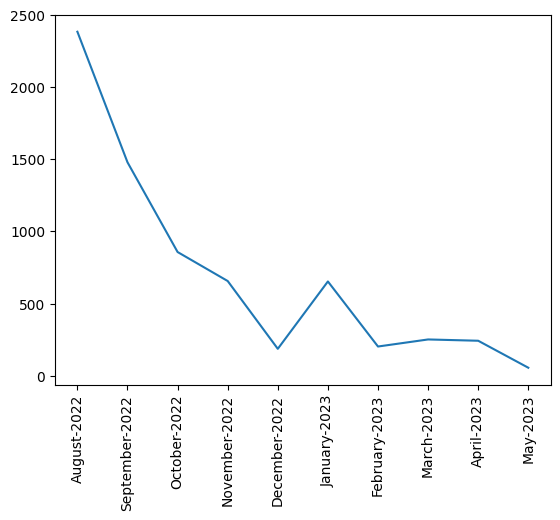

In [74]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
chat_info['date'] = chat_info['date_time'].dt.date
chat_info

,date_time,user,message,year,month,day,hour,minute,month_num,date
0,2022-08-01 16:31:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2022,August,1,16,31,8,2022-08-01
1,2022-08-01 13:10:00,Group Notification,"Pratik DTU created group ""M.TECH DATA SCIENCE ...",2022,August,1,13,10,8,2022-08-01
2,2022-08-01 16:20:00,Group Notification,Sharda DTU added you\n,2022,August,1,16,20,8,2022-08-01
3,2022-08-01 16:21:00,Group Notification,Sharda DTU added Osama Mustafa\n,2022,August,1,16,21,8,2022-08-01
4,2022-08-01 16:25:00,Group Notification,Sharda DTU added +91 85878 24401\n,2022,August,1,16,25,8,2022-08-01
...,...,...,...,...,...,...,...,...,...,...
6960,2023-05-12 20:17:00,Vaibhavi Mishra,Ok\n,2023,May,12,20,17,5,2023-05-12
6961,2023-05-13 15:43:00,Anmol DTU,@919021567060\n,2023,May,13,15,43,5,2023-05-13
6962,2023-05-13 15:43:00,Anmol DTU,?\n,2023,May,13,15,43,5,2023-05-13
6963,2023-05-13 15:43:00,Vaibhavi Mishra,Ma'am ne koi reply nahi diya\n,2023,May,13,15,43,5,2023-05-13


In [76]:
chat_info.groupby(['date']).count()['message']

date
2022-08-01     59
2022-08-02     16
2022-08-03    157
2022-08-04    131
2022-08-05    168
             ... 
2023-05-04     12
2023-05-05      4
2023-05-09     14
2023-05-12      6
2023-05-13      4
Name: message, Length: 220, dtype: int64

In [77]:
daily_timeline = chat_info.groupby(['date']).count()['message'].reset_index()
daily_timeline.head()

,date,message
0,2022-08-01,59
1,2022-08-02,16
2,2022-08-03,157
3,2022-08-04,131
4,2022-08-05,168


In [78]:
daily_timeline.rename(columns={'message':'message_count'}, inplace=True)
daily_timeline.head()

,date,message_count
0,2022-08-01,59
1,2022-08-02,16
2,2022-08-03,157
3,2022-08-04,131
4,2022-08-05,168


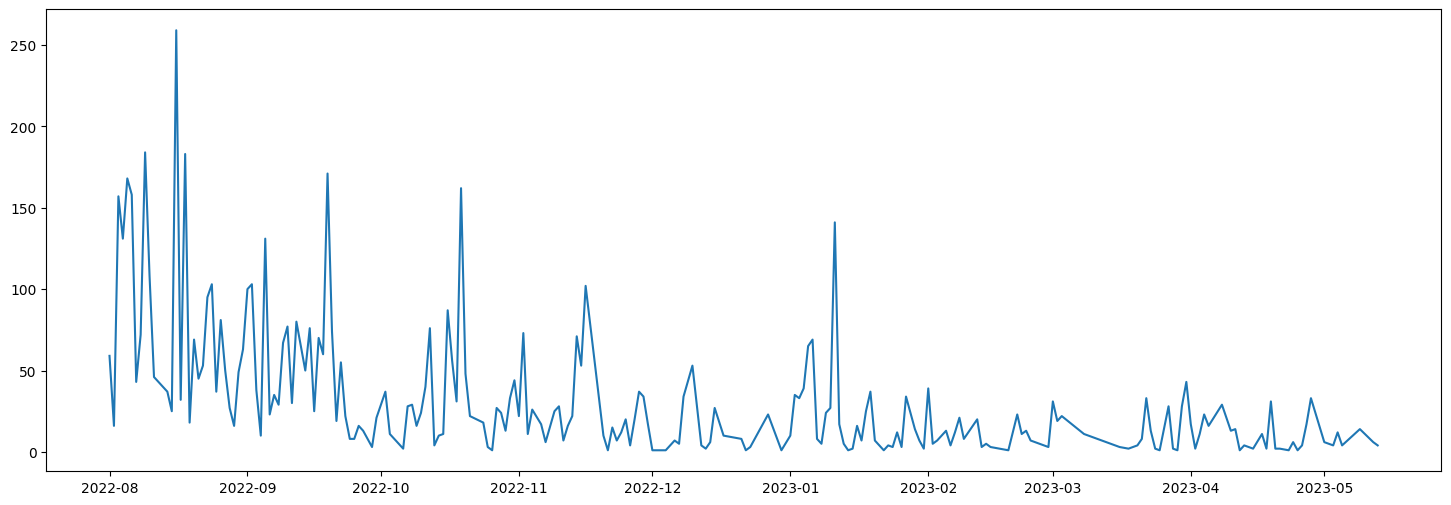

In [79]:
plt.figure(figsize=(18,6))
plt.plot(daily_timeline['date'], daily_timeline['message_count'])

In [80]:
chat_info['day_name'] = chat_info['date_time'].dt.day_name()
chat_info.head()

,date_time,user,message,year,month,day,hour,minute,month_num,date,day_name
0,2022-08-01 16:31:00,Group Notification,Messages and calls are end-to-end encrypted. N...,2022,August,1,16,31,8,2022-08-01,Monday
1,2022-08-01 13:10:00,Group Notification,"Pratik DTU created group ""M.TECH DATA SCIENCE ...",2022,August,1,13,10,8,2022-08-01,Monday
2,2022-08-01 16:20:00,Group Notification,Sharda DTU added you\n,2022,August,1,16,20,8,2022-08-01,Monday
3,2022-08-01 16:21:00,Group Notification,Sharda DTU added Osama Mustafa\n,2022,August,1,16,21,8,2022-08-01,Monday
4,2022-08-01 16:25:00,Group Notification,Sharda DTU added +91 85878 24401\n,2022,August,1,16,25,8,2022-08-01,Monday


In [81]:
weekly_actvity = chat_info.groupby(['day_name']).count()['message']
weekly_actvity.sort_values(ascending=False)

day_name
Wednesday    1472
Tuesday      1192
Thursday     1101
Monday       1071
Friday        887
Saturday      670
Sunday        572
Name: message, dtype: int64

In [82]:
chat_info['day_name'].value_counts()

day_name
Wednesday    1472
Tuesday      1192
Thursday     1101
Monday       1071
Friday        887
Saturday      670
Sunday        572
Name: count, dtype: int64

In [83]:
df = chat_info.groupby(['year','month','day_name']).count()['message'].reset_index().sort_values(by=['year','message','month','day_name'], ascending=False)

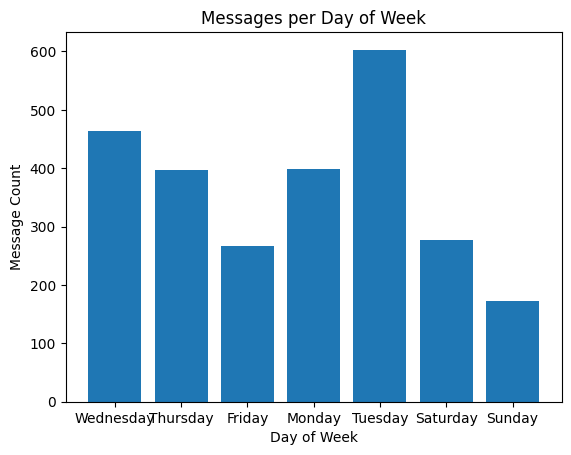

In [84]:
import matplotlib.pyplot as plt

# assuming your dataframe is called df
plt.bar(df['day_name'], df['message'])
plt.xlabel('Day of Week')
plt.ylabel('Message Count')
plt.title('Messages per Day of Week')
plt.show()


In [85]:
## Now, its time to see the online activty time period using heatmap

period = []
for hour in chat_info[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str("00"))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

In [86]:
chat_info['period'] = period

In [87]:
chat_info.sample(5)

,date_time,user,message,year,month,day,hour,minute,month_num,date,day_name,period
1421,2022-08-16 21:40:00,Sharda DTU,bulaya to nhi h\n,2022,August,16,21,40,8,2022-08-16,Tuesday,21-22
6396,2023-02-23 00:42:00,Tarakashar Das DTU,Okay\n,2023,February,23,0,42,2,2023-02-23,Thursday,00-1
6689,2023-04-03 09:36:00,Vaibhavi Mishra,Please carry your ID card\n\nMarksheet lene ja...,2023,April,3,9,36,4,2023-04-03,Monday,9-10
2588,2022-09-03 19:09:00,Anmol DTU,<Media omitted>\n,2022,September,3,19,9,9,2022-09-03,Saturday,19-20
3411,2022-09-18 00:42:00,Sharda DTU,Sports Trials links\n\nFootball\nBoys- https:/...,2022,September,18,0,42,9,2022-09-18,Sunday,00-1


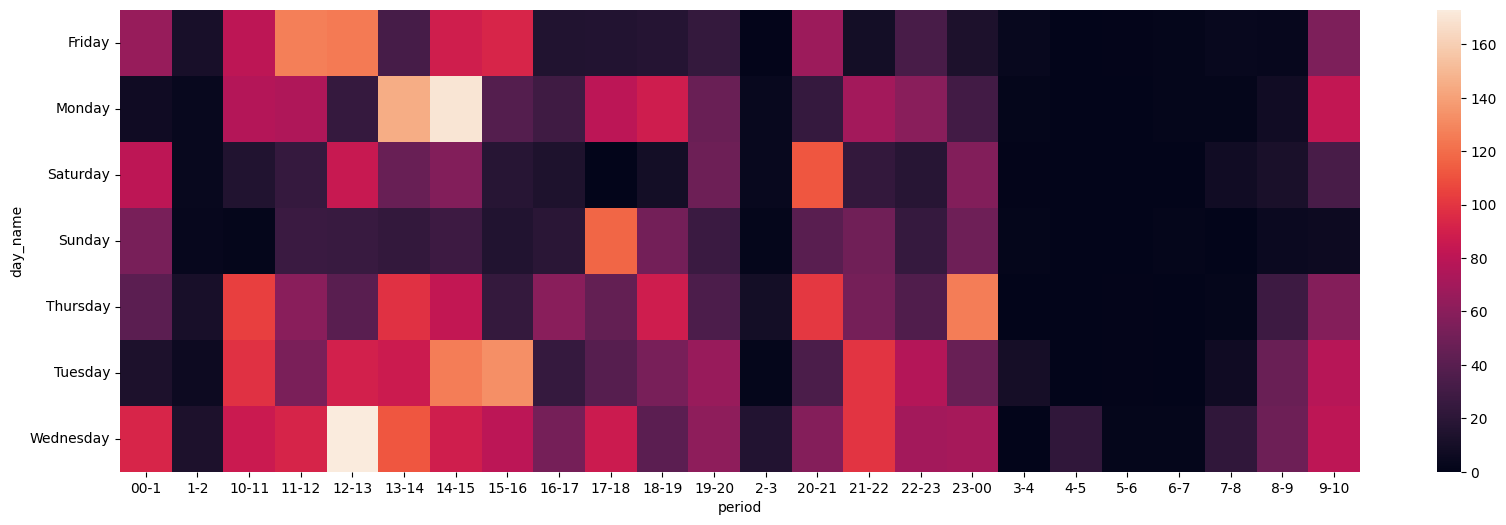

In [88]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(chat_info.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [89]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:
# Calculate sentiment polarity for each message
chat_info['Polarity'] = chat_info['message'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

In [94]:
chat_info.sample(15)

,date_time,user,message,year,month,day,hour,minute,month_num,date,day_name,period,Polarity
6288,2023-02-07 11:21:00,Jaya DTU,Ma'am aa gai h\n,2023,February,7,11,21,2,2023-02-07,Tuesday,11-12,0.0000
1943,2022-08-23 21:14:00,Sharda DTU,before 12\n,2022,August,23,21,14,8,2022-08-23,Tuesday,21-22,0.0000
165,2022-08-03 12:26:00,LORD Bikki,No one here\n,2022,August,3,12,26,8,2022-08-03,Wednesday,12-13,-0.2960
6521,2023-03-22 11:09:00,Vaibhavi Mishra,1 hour ka hi class hoga\n,2023,March,22,11,9,3,2023-03-22,Wednesday,11-12,0.0000
5255,2022-11-25 11:52:00,Vaibhavi Mishra,Kaha jana hai\n,2022,November,25,11,52,11,2022-11-25,Friday,11-12,0.0000
3860,2022-09-30 21:23:00,Harshit DTU,This message was deleted\n,2022,September,30,21,23,9,2022-09-30,Friday,21-22,0.0000
6605,2023-03-30 09:48:00,Vaibhavi Mishra,Ma'am bol rahe hai 10:30 tak\n,2023,March,30,9,48,3,2023-03-30,Thursday,9-10,0.0000
6883,2023-04-28 11:06:00,Vaibhavi Mishra,Tumahri already 75% se upar hai\n,2023,April,28,11,6,4,2023-04-28,Friday,11-12,0.0000
290,2022-08-04 13:17:00,Anmol DTU,Kyo\n,2022,August,4,13,17,8,2022-08-04,Thursday,13-14,0.0000
3843,2022-09-30 14:22:00,Sourav Seal,Hum log bhi kar rahe hain na?\n,2022,September,30,14,22,9,2022-09-30,Friday,14-15,0.0000
